# Rain In Australia Pycaret

Pycaret classification tutorial:

https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb

Based on:



In [1]:
import os
from pathlib import Path
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import ClassificationExperiment

In [ ]:
# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

DATASET_FILE = Path("../data/weatherAUS.csv")

api.dataset_download_files("jsphyg/weather-dataset-rattle-package", path="../data", unzip=True)

In [14]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
sns.set_palette("Set2")

In [3]:
df = pd.read_csv(DATASET_FILE, parse_dates=["Date"])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df = df.dropna(subset=["RainTomorrow"])

In [65]:
from sklearn.metrics import classification_report

def print_report(df: pd.DataFrame):
    print(
        classification_report(
            y_true=df["RainTomorrow"],
            y_pred=df["prediction_label"],
            digits=4,
        )
    )

## Experiment 1

In [18]:
exp1 = ClassificationExperiment()

exp1.setup(
    df, 
    target="RainTomorrow",
    # preprocess=False,
    # fix_imbalance=True,
    # normalize=True,
    session_id=42,
    n_jobs=4,
    use_gpu=False
)

,Description,Value
0,Session id,42
1,Target,RainTomorrow
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(142193, 23)"
5,Transformed data shape,"(142193, 70)"
6,Transformed train set shape,"(99535, 70)"
7,Transformed test set shape,"(42658, 70)"
8,Ordinal features,1
9,Numeric features,16


In [20]:
pd.set_option("display.max_columns", None)
exp1.get_config("X_transformed")

,Date_year,Date_month,Date_day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_NW,WindGustDir_NE,WindGustDir_N,WindGustDir_W,WindGustDir_ENE,WindGustDir_WNW,WindGustDir_S,WindGustDir_E,WindGustDir_SW,WindGustDir_SSW,WindGustDir_SSE,WindGustDir_WSW,WindGustDir_ESE,WindGustDir_SE,WindGustDir_NNW,WindGustDir_NNE,WindGustSpeed,WindDir9am_SSW,WindDir9am_NNW,WindDir9am_NNE,WindDir9am_WNW,WindDir9am_NE,WindDir9am_NW,WindDir9am_SW,WindDir9am_ENE,WindDir9am_W,WindDir9am_N,WindDir9am_SE,WindDir9am_ESE,WindDir9am_E,WindDir9am_SSE,WindDir9am_WSW,WindDir9am_S,WindDir3pm_SE,WindDir3pm_NW,WindDir3pm_ENE,WindDir3pm_N,WindDir3pm_WNW,WindDir3pm_NNW,WindDir3pm_S,WindDir3pm_ESE,WindDir3pm_W,WindDir3pm_SSE,WindDir3pm_E,WindDir3pm_WSW,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_NE,WindDir3pm_NNE,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
26038,2014,5,24,0.196548,10.600000,24.900000,0.0,5.49147,7.623222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,68.0,47.0,1017.655823,1015.259460,4.434881,4.505451,16.700001,23.299999,0.0
83712,2016,9,4,0.313324,6.000000,15.100000,1.6,5.49147,7.623222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,24.0,94.0,77.0,1023.000000,1024.000000,4.434881,4.505451,10.600000,13.900000,1.0
12822,2011,1,26,0.142710,24.600000,41.400002,0.0,12.40000,12.800000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,11.0,51.0,24.0,1012.700012,1009.599976,0.000000,1.000000,30.100000,39.299999,0.0
59778,2013,8,22,0.180095,3.700000,12.600000,6.6,1.40000,7.623222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,19.0,95.0,71.0,1011.299988,1009.400024,8.000000,8.000000,8.500000,12.200000,1.0
78980,2011,10,19,0.250836,7.600000,27.900000,0.0,8.00000,12.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,22.0,57.0,36.0,1026.599976,1023.099976,1.000000,1.000000,19.799999,27.299999,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138421,2015,8,6,0.082205,-1.200000,18.400000,0.0,4.40000,10.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,19.0,54.0,25.0,1026.300049,1022.599976,0.000000,0.000000,8.700000,17.400000,0.0
44306,2013,12,23,0.235294,20.900000,24.799999,0.0,5.49147,7.623222,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,26.0,88.0,87.0,1007.000000,1005.799988,4.434881,4.505451,22.700001,23.100000,0.0
119535,2014,6,19,0.194538,9.200000,17.799999,3.8,2.20000,2.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,11.0,95.0,94.0,1021.000000,1018.799988,7.000000,6.000000,12.200000,16.799999,1.0
123644,2016,12

In [7]:
exp1_top3_models = exp1.compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8633,0.8971,0.8633,0.8563,0.8551,0.5650,0.5759,6.2430
xgboost,Extreme Gradient Boosting,0.8589,0.8919,0.8589,0.8513,0.8511,0.5540,0.5632,3.0340
lightgbm,Light Gradient Boosting Machine,0.8573,0.8885,0.8573,0.8495,0.8482,0.5434,0.5552,0.7070
rf,Random Forest Classifier,0.8550,0.8849,0.8550,0.8475,0.8427,0.5222,0.5415,2.5600
et,Extra Trees Classifier,0.8523,0.8833,0.8523,0.8447,0.8386,0.5082,0.5304,3.2790
gbc,Gradient Boosting Classifier,0.8492,0.8729,0.8492,0.8401,0.8379,0.5096,0.5247,3.4200
lr,Logistic Regression,0.8422,0.8650,0.8422,0.8317,0.8310,0.4897,0.5028,4.9230
lda,Linear Discriminant Analysis,0.8418,0.8633,0.8418,0.8315,0.8320,0.4950,0.5052,0.8030
ada,Ada Boost Classifier,0.8417,0.8620,0.8417,0.8312,0.8308,0.4893,0.5018,1.2530
ridge,Ridge Classifier,0.8409,0.0000,0.8409,0.8308,0.8249,0.4650,0.4886,0.3290


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [52]:
mlp = exp1.create_model("mlp")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8332,0.8562,0.8332,0.8274,0.8070,0.4012,0.4495
1,0.8358,0.8575,0.8358,0.8262,0.8154,0.4317,0.4648
2,0.7732,0.8691,0.7732,0.8335,0.7888,0.4656,0.4927
3,0.8148,0.8682,0.8148,0.8321,0.7643,0.2613,0.3677
4,0.8358,0.8713,0.8358,0.8309,0.8105,0.4125,0.4605
5,0.7718,0.8683,0.7718,0.8339,0.7878,0.4646,0.4927
6,0.8348,0.8668,0.8348,0.8287,0.8099,0.4107,0.4565
7,0.8447,0.8717,0.8447,0.8353,0.8298,0.4806,0.5031
8,0.8370,0.8663,0.8370,0.8329,0.8346,0.5181,0.5188


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
tuned_mlp = exp1.tune_model(mlp, optimize="Recall")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8380,0.8564,0.8380,0.8271,0.8281,0.4833,0.4930
1,0.8387,0.8544,0.8387,0.8275,0.8243,0.4654,0.4844
2,0.8438,0.8671,0.8438,0.8360,0.8258,0.4650,0.4958
3,0.8427,0.8654,0.8427,0.8344,0.8365,0.5147,0.5193
4,0.8443,0.8685,0.8443,0.8343,0.8340,0.4998,0.5116
5,0.8419,0.8641,0.8419,0.8313,0.8307,0.4890,0.5018
6,0.8427,0.8650,0.8427,0.8323,0.8297,0.4830,0.5001
7,0.8456,0.8689,0.8456,0.8358,0.8329,0.4929,0.5101
8,0.8403,0.8645,0.8403,0.8299,0.8305,0.4906,0.5006


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [55]:
tuned_mlp

MLPClassifier(activation='relu', alpha=0.15, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[50, 50, 50], learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [70]:
mlp_preds = exp1.predict_model(tuned_mlp)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.8437,0.8649,0.8437,0.8347,0.8365,0.5127,0.5188


In [71]:
print_report(mlp_preds)

              precision    recall  f1-score   support

          No     0.8755    0.9308    0.9023     33095
         Yes     0.6937    0.5420    0.6085      9563

    accuracy                         0.8437     42658
   macro avg     0.7846    0.7364    0.7554     42658
weighted avg     0.8347    0.8437    0.8365     42658



In [22]:
catboost = exp1.create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8640,0.8923,0.8640,0.8574,0.8548,0.5620,0.5757
1,0.8571,0.8891,0.8571,0.8493,0.8485,0.5449,0.5557
2,0.8661,0.9007,0.8661,0.8595,0.8584,0.5754,0.5857
3,0.8597,0.9004,0.8597,0.8522,0.8509,0.5518,0.5634
4,0.8653,0.9018,0.8653,0.8586,0.8581,0.5754,0.5844
5,0.8610,0.8976,0.8610,0.8538,0.8529,0.5587,0.5690
6,0.8639,0.8946,0.8639,0.8570,0.8560,0.5682,0.5784
7,0.8663,0.8983,0.8663,0.8598,0.8583,0.5743,0.5855
8,0.8629,0.8966,0.8629,0.8559,0.8543,0.5619,0.5737


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
tuned_catboost, exp1_tuner = exp1.tune_model(catboost, optimize="F1", return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8504,0.8725,0.8504,0.8418,0.8381,0.5084,0.5264
1,0.8504,0.8721,0.8504,0.8415,0.8395,0.5149,0.5294
2,0.8543,0.8845,0.8543,0.8462,0.8435,0.5269,0.5421
3,0.8529,0.8838,0.8529,0.8445,0.8418,0.5215,0.5371
4,0.8556,0.8862,0.8556,0.8476,0.8458,0.5351,0.5483
5,0.8527,0.8826,0.8527,0.8443,0.8412,0.5190,0.5355
6,0.8521,0.8802,0.8521,0.8435,0.8412,0.5200,0.5348
7,0.8581,0.8830,0.8581,0.8507,0.8477,0.5394,0.5549
8,0.8519,0.8788,0.8519,0.8433,0.8407,0.5178,0.5334


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
catboost.get_params()

{'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 42}

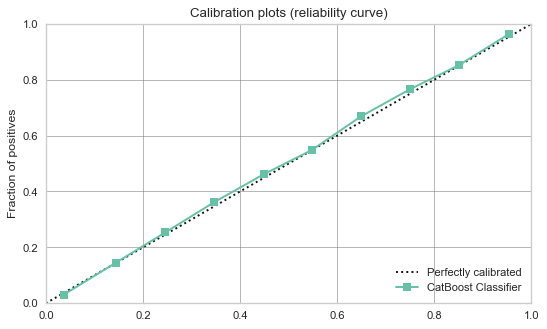

In [47]:
# check calbiration of default dt
exp1.plot_model(catboost, plot="calibration", scale=0.8)

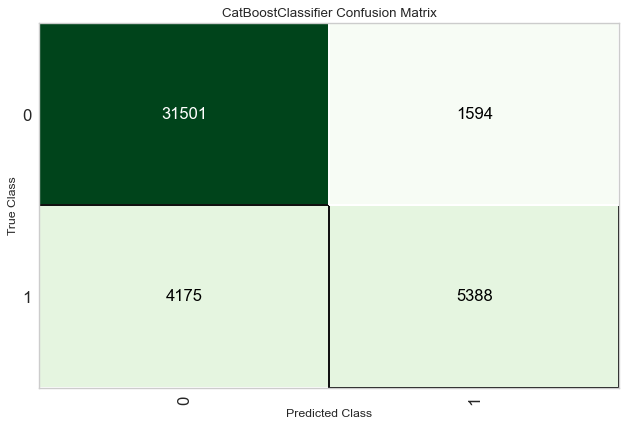

In [46]:
exp1.plot_model(catboost, plot="confusion_matrix", scale=0.8)

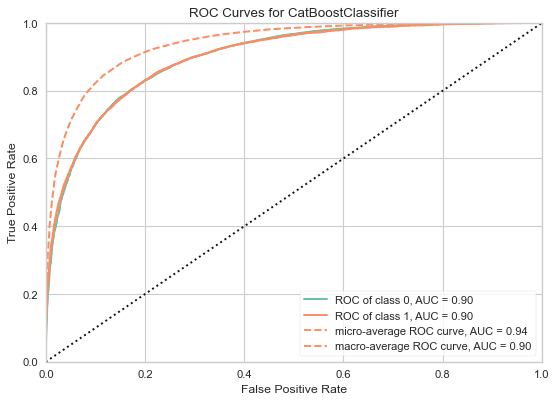

In [48]:
# plot AUC
exp1.plot_model(catboost, plot="auc", scale=0.8)

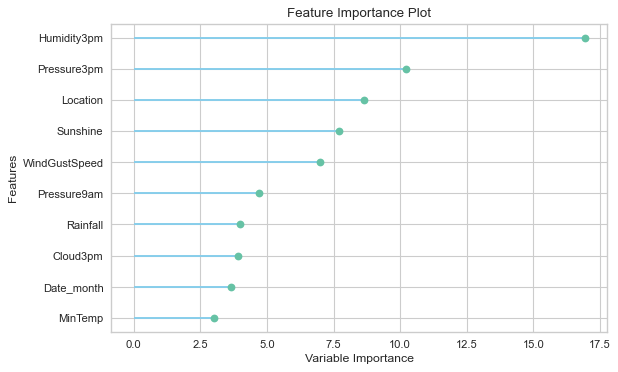

In [64]:
# plot feature importance
exp1.plot_model(catboost, plot="feature", scale=0.8) 
# exp1.plot_model(catboost, plot="feature_all", scale=0.8) 

In [66]:
exp1_cb_preds = exp1.predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8648,0.9001,0.8648,0.8580,0.8568,0.5699,0.5808


In [68]:
exp1_cb_preds.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,prediction_label,prediction_score
59900,2013-12-22,Bendigo,19.799999,27.900000,0.0,4.6,NaN,WNW,41.0,SSE,NW,9.0,17.0,56.0,48.0,1007.700012,1007.099976,5.0,1.0,24.299999,27.100000,No,Yes,No,0.8469
33531,2009-01-12,SydneyAirport,18.500000,24.000000,0.8,8.8,11.4,S,39.0,S,S,9.0,28.0,81.0,72.0,1015.500000,1016.500000,1.0,3.0,21.799999,23.700001,No,No,No,0.9424
30126,2017-05-07,Richmond,9.400000,21.200001,0.0,NaN,NaN,SW,28.0,SSW,SSE,9.0,11.0,64.0,23.0,1024.500000,1023.099976,NaN,NaN,17.100000,20.900000,No,No,No,0.9924
88727,2013-05-05,Cairns,20.799999,28.100000,13.6,4.0,8.0,SE,37.0,S,SSE,15.0,24.0,75.0,63.0,1017.099976,1013.700012,7.0,6.0,24.200001,26.200001,Yes,No,No,0.7741
56821,2013-11-13,Ballarat,7.300000,11.500000,9.2,NaN,NaN,W,44.0,W,WSW,28.0,24.0,98.0,98.0,1014.099976,1013.900024,6.0,8.0,9.100000,10.300000,Yes,Yes,Yes,0.9136


In [69]:
print_report(exp1_cb_preds)

              precision    recall  f1-score   support

          No     0.8830    0.9518    0.9161     33095
         Yes     0.7717    0.5634    0.6513      9563

    accuracy                         0.8648     42658
   macro avg     0.8273    0.7576    0.7837     42658
weighted avg     0.8580    0.8648    0.8568     42658



## Experiment 2

In [72]:
exp2 = ClassificationExperiment()

exp2.setup(
    df, 
    target="RainTomorrow",
    # preprocess=False,
    # fix_imbalance=True,
    # remove_multicollinearity=True,
    # remove_outliers=True,
    # outliers_method="iforest",
    normalize=True,
    # transformation=True,
    # transformation_method="yeo-johnson",
    # log_experiment=True,
    # expirement_name="exp2",
    session_id=42,
    n_jobs=4
)

,Description,Value
0,Session id,42
1,Target,RainTomorrow
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(142193, 23)"
5,Transformed data shape,"(142193, 70)"
6,Transformed train set shape,"(99535, 70)"
7,Transformed test set shape,"(42658, 70)"
8,Ordinal features,1
9,Numeric features,16


In [75]:
pd.set_option("display.max_columns", None)
exp2.get_config("X_transformed")

,Date_year,Date_month,Date_day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_NW,WindGustDir_NE,WindGustDir_N,WindGustDir_W,WindGustDir_ENE,WindGustDir_WNW,WindGustDir_S,WindGustDir_E,WindGustDir_SW,WindGustDir_SSW,WindGustDir_SSE,WindGustDir_WSW,WindGustDir_ESE,WindGustDir_SE,WindGustDir_NNW,WindGustDir_NNE,WindGustSpeed,WindDir9am_SSW,WindDir9am_NNW,WindDir9am_NNE,WindDir9am_WNW,WindDir9am_NE,WindDir9am_NW,WindDir9am_SW,WindDir9am_ENE,WindDir9am_W,WindDir9am_N,WindDir9am_SE,WindDir9am_ESE,WindDir9am_E,WindDir9am_SSE,WindDir9am_WSW,WindDir9am_S,WindDir3pm_SE,WindDir3pm_NW,WindDir3pm_ENE,WindDir3pm_N,WindDir3pm_WNW,WindDir3pm_NNW,WindDir3pm_S,WindDir3pm_ESE,WindDir3pm_W,WindDir3pm_SSE,WindDir3pm_E,WindDir3pm_WSW,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_NE,WindDir3pm_NNE,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
26038,0.487136,-0.409837,0.941307,-0.425301,-0.246601,0.234796,-0.278166,-4.234119e-09,-3.623016e-08,4.072935,-0.229155,-0.258643,-0.392806,-0.244025,-0.245638,-0.259504,-0.261527,-0.254573,-0.253924,-0.258842,-0.258156,-0.234854,-0.264887,-0.221624,-0.217831,-1.519377,4.261428,-0.240656,-0.243099,-0.231549,-0.236137,-0.253318,-0.249114,-0.240048,-0.246671,-0.421767,-0.261264,-0.237721,-0.259614,-0.259151,-0.224256,-0.254036,2.967559,-0.252103,-0.240656,-0.254707,-0.255534,-0.241402,-0.268281,-0.24941,-0.272815,-0.261921,-0.249614,-0.265668,-0.2434,-0.262709,-0.245661,-0.217273,-1.129894,-2.134835,-0.042896,-0.218081,-0.000006,-0.000006,-2.676300e-08,2.209113e-08,-0.043318,0.234936,-0.532209
83712,1.273765,0.757832,-1.331284,1.371924,-0.966319,-1.141668,-0.088709,-4.234119e-09,-3.623016e-08,4.072935,-0.229155,-0.258643,-0.392806,-0.244025,-0.245638,-0.259504,-0.261527,-0.254573,-0.253924,-0.258842,-0.258156,-0.234854,-0.264887,-0.221624,-0.217831,0.079301,-0.234663,4.155316,-0.243099,-0.231549,-0.236137,-0.253318,-0.249114,-0.240048,-0.246671,-0.421767,-0.261264,-0.237721,-0.259614,-0.259151,-0.224256,-0.254036,-0.336977,3.966635,-0.240656,-0.254707,-0.255534,-0.241402,-0.268281,-0.24941,-0.272815,-0.261921,-0.249614,-0.265668,-0.2434,-0.262709,-0.245661,-0.217273,0.114370,0.614117,1.328234,1.241518,0.792173,1.308123,-2.676300e-08,2.209113e-08,-0.983944,-1.130833,1.878961
12822,-0.692808,-1.577506,1.168567,-1.253892,1.943843,2.552314,-0.278166,2.167146e+00,1.894220e+00,-0.245523,4.363862,-0.258643,-0.392806,-0.244025,-0.245638,-0.259504,-0.261527,-0.254573,-0.253924,-0.258842,-0.258156,-0.234854,-0.264887,-0.221624,-0.217831,-0.681974,-0.234663,-0.240656,4.113553,-0.231549,-0.236137,-0.253318,-0.249114,-0.240048,-0.246671,-0.421767,-0.261264,-0.237721,-0.259614,-0.259151,-0.224256,-0.254036,-0.336977,-0.252103,4.155316,-0.254707,-0.255534,-0.241402,-0.268281,-0.24941,-0.272815,-0.261921,-0.249614,-0.265668,-0.2434,-0.262709,-0.245661,-0.217273,0.679944,-0.874899,-0.939404,-1.337107,-0.734616,-0.847018,-1.947912e+00,-1.665776e+00,2.022974,2.559650,-0.532209
59778,0.093821,0.465915,0.714048,-0.678530,-1.326178,-1.492807,0.503343,-1.283458e+00,-3.623016e-08,4.072935,-0.229155,-0.258643,-0.392806,-0.244025,-0.245638,-0.259504,-0.261527,-0.254573,-0.253924,-0.258842,-0.258156,-0.234854,-0.264887,-0.221624,-0.217831,0.079301,-0.234663,-0.240656,-0.243099,4.318742,-0.236137,-0.253318,-0.249114,-0.240048,-0.246671,-0.421767,-0.261264,-0.237721,-0.259614,-0.259151,-0.224256,-0.254036,-0.336977,3.966635,-0.240656,-0.254707,-0.255534,-0.241402,-0.268281,-0.24941,-0.272815,-0.261921,-0.249614,-0.265668,-0.2434,-0.262709,-0.245661,-0.217273,0.114370,0.041419,1.380970,0.949598,-0.942145,-0.876943,1.565891e+00,1.660596e+00,-1.307766,-1.377834,1.878961
78980,-0.692808,1.049750,0.373160,0.410213,-0.715983,0.656163,-0.278166,7.869040e-01,1.784448e+00,-0.245523,-0.229155,3.866338,-0.392806,-0.244025,-0.245638,-0.259504,-0.261527,-0.254573,-0.253924,-0.258842,-0.258156,-0.234854,-0.264887,-0.221624,-0.217831,1.068959,-0.234663,-0.240656,-0.243099

In [17]:
exp2_top3_models = exp2.compare_models(
    sort = "Recall",
    inclue=["knn"], 
    n_select=3
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8622,0.8964,0.8622,0.8551,0.8539,0.5615,0.5723,8.0620
xgboost,Extreme Gradient Boosting,0.8586,0.8912,0.8586,0.8510,0.8510,0.5541,0.5628,5.8510
lightgbm,Light Gradient Boosting Machine,0.8575,0.8883,0.8575,0.8497,0.8486,0.5448,0.5562,3.6260
rf,Random Forest Classifier,0.8546,0.8846,0.8546,0.8470,0.8423,0.5211,0.5403,5.8870
et,Extra Trees Classifier,0.8518,0.8826,0.8518,0.8444,0.8376,0.5044,0.5280,6.2350
gbc,Gradient Boosting Classifier,0.8491,0.8730,0.8491,0.8399,0.8377,0.5090,0.5242,10.4760
lr,Logistic Regression,0.8422,0.8655,0.8422,0.8318,0.8315,0.4919,0.5040,4.4950
ada,Ada Boost Classifier,0.8419,0.8616,0.8419,0.8314,0.8309,0.4897,0.5024,4.5930
lda,Linear Discriminant Analysis,0.8415,0.8634,0.8415,0.8315,0.8326,0.4985,0.5070,4.0500
ridge,Ridge Classifier,0.8407,0.0000,0.8407,0.8305,0.8250,0.4656,0.4885,3.4990


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [74]:
exp2_catboost = exp2.create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8602,0.8915,0.8602,0.8529,0.8506,0.5495,0.5631
1,0.8577,0.8891,0.8577,0.8500,0.8494,0.5482,0.5584
2,0.8652,0.9008,0.8652,0.8585,0.8574,0.5723,0.5827
3,0.8586,0.9007,0.8586,0.8510,0.8501,0.5496,0.5606
4,0.8649,0.9019,0.8649,0.8582,0.8578,0.5747,0.5834
5,0.8630,0.8988,0.8630,0.8559,0.8550,0.5651,0.5754
6,0.8631,0.8952,0.8631,0.8561,0.8552,0.5656,0.5758
7,0.8682,0.8979,0.8682,0.8620,0.8602,0.5799,0.5914
8,0.8625,0.8958,0.8625,0.8554,0.8540,0.5611,0.5726


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
tuned_exp2_catboost, exp2_cb_tuner = exp2.tune_model(exp2_catboost, optimize="Recall", return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8504,0.8725,0.8504,0.8418,0.8381,0.5084,0.5264
1,0.8504,0.8721,0.8504,0.8415,0.8395,0.5149,0.5294
2,0.8543,0.8845,0.8543,0.8462,0.8435,0.5269,0.5421
3,0.8529,0.8838,0.8529,0.8445,0.8418,0.5215,0.5371
4,0.8560,0.8867,0.8560,0.8480,0.8462,0.5362,0.5495
5,0.8527,0.8826,0.8527,0.8443,0.8412,0.5190,0.5355
6,0.8521,0.8802,0.8521,0.8435,0.8412,0.5200,0.5348
7,0.8581,0.8830,0.8581,0.8507,0.8477,0.5394,0.5549
8,0.8519,0.8788,0.8519,0.8433,0.8407,0.5178,0.5334


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
